<a href="https://colab.research.google.com/github/marioluciofjr/codesoiram.python/blob/main/bandeira_do_brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# Instalação da biblioteca Pillow, que é um fork da biblioteca descontinuada PIL
!pip install -q -U pillow

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3070, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2863, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3061, in _parsed_pkg_info
    return self._pkg_info
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2863, in __getattr__
    raise AttributeError(attr)
AttributeError: _pkg_info. Did you mean: 'egg_info'?

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py",

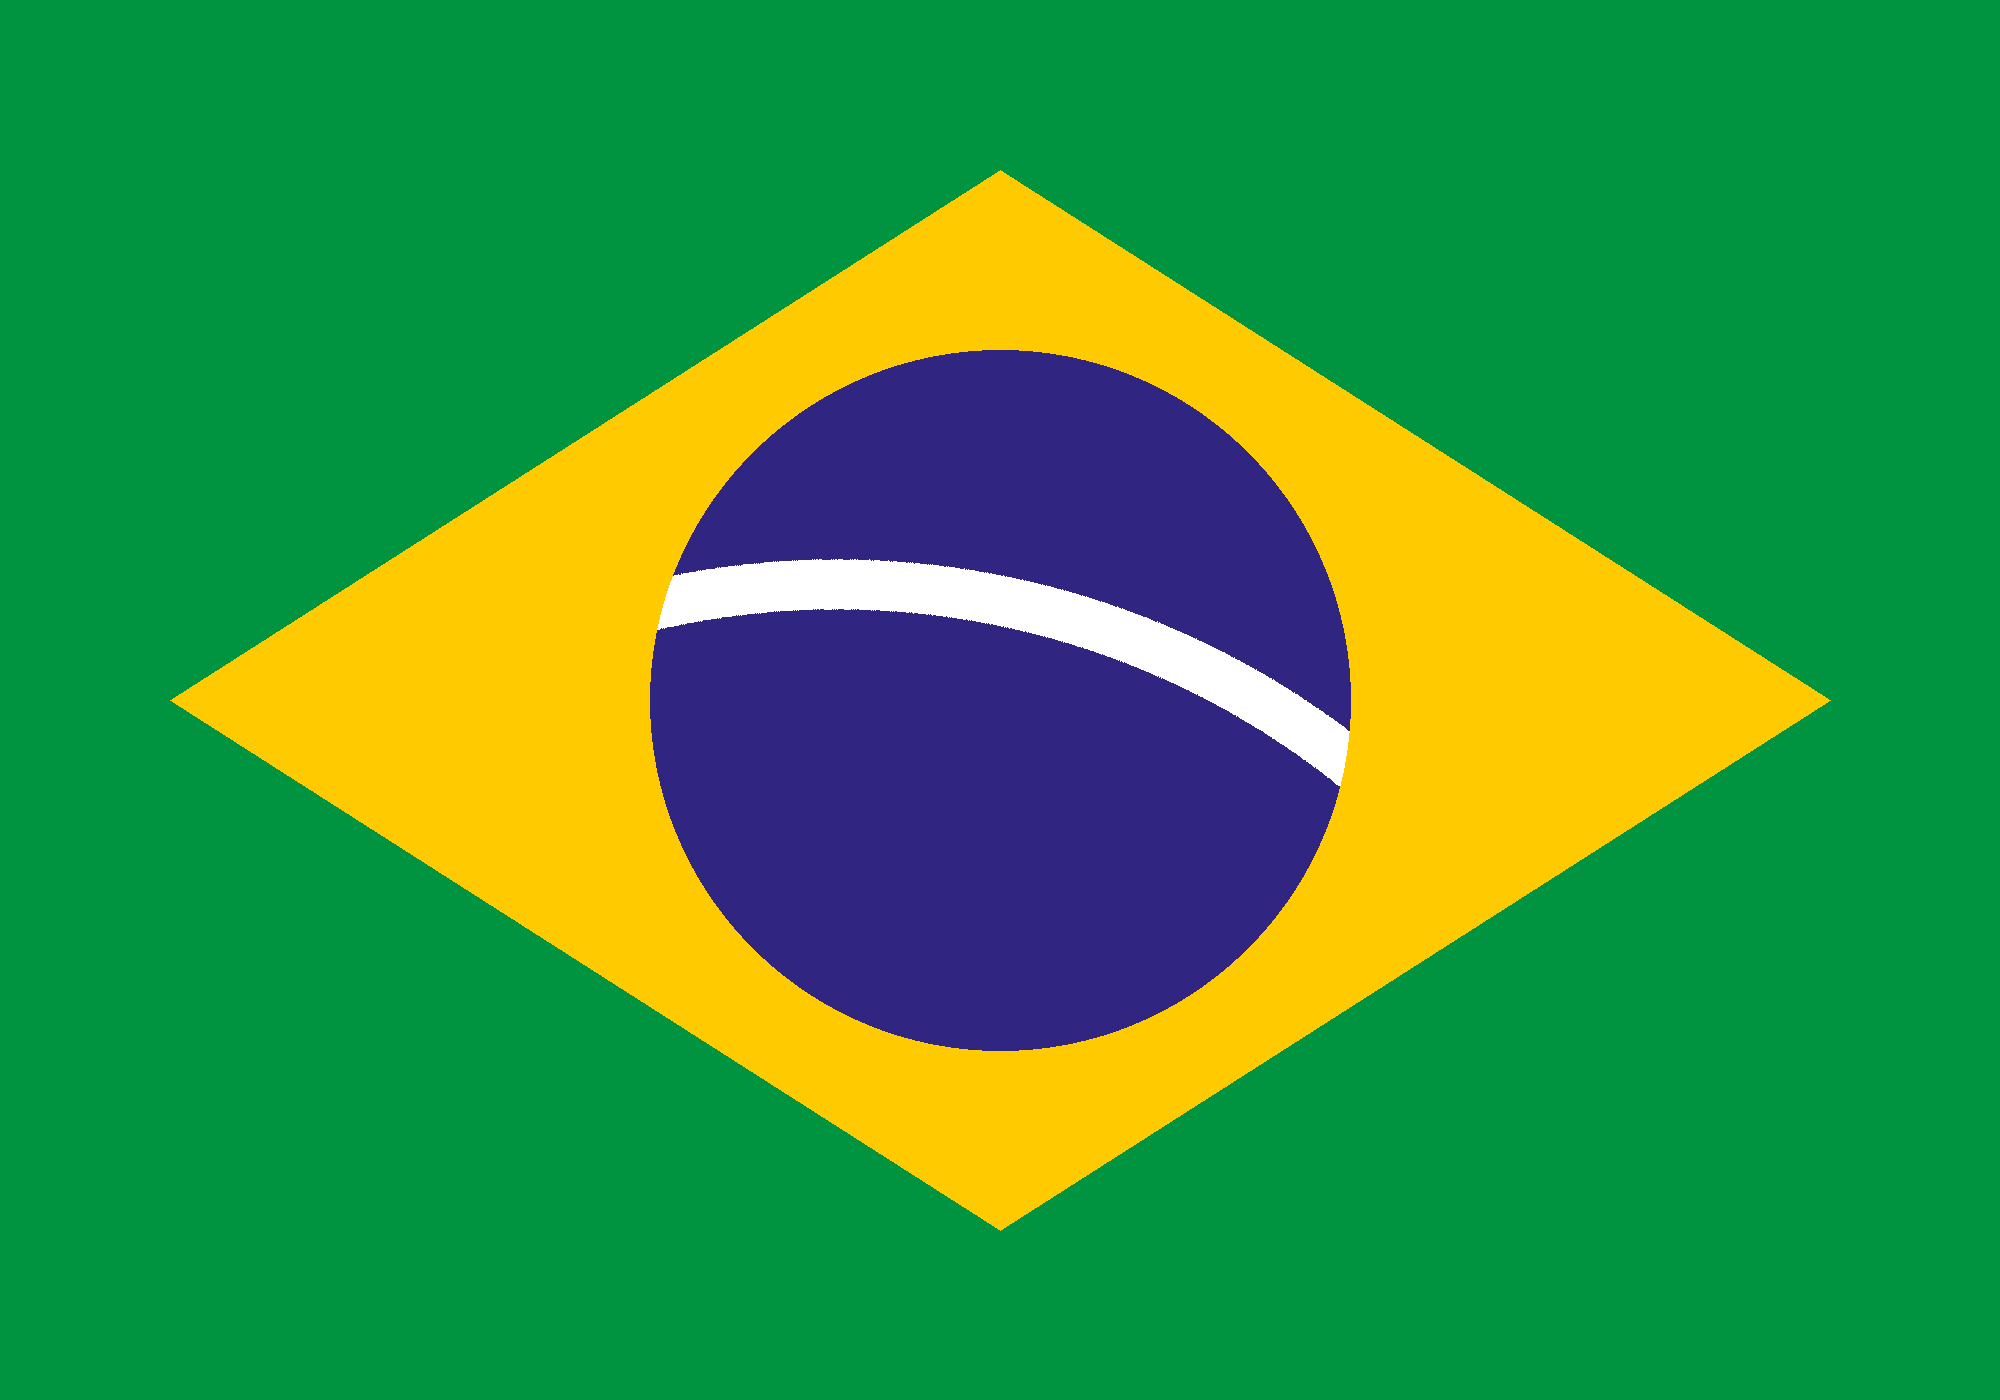

In [17]:
# Importando os pacotes necessários
from PIL import Image, ImageDraw, ImageChops
from google.colab import files
import math

# Constantes para as cores da bandeira do Brasil
verde = "#009440"
amarelo = "#ffcb00"
azul = "#302681"
branco = "#FFFFFF"

# Função auxiliar para desenhar o losango
def desenha_losango(draw, largura, altura, modulo, cor):
    # Coordenadas dos vértices do losango (baseado na distância de 1,7 M do retângulo)
    distancia_losango = 1.7 * modulo
    vertices = [
        (largura // 2, distancia_losango),  # vértice superior
        (largura - distancia_losango, altura // 2),  # vértice direito
        (largura // 2, altura - distancia_losango),  # vértice inferior
        (distancia_losango, altura // 2)  # vértice esquerdo
    ]
    draw.polygon(vertices, fill=cor)

# Função auxiliar para desenhar o círculo azul
def desenha_circulo(draw, largura, altura, modulo, cor):
    raio_circulo = 3.5 * modulo
    centro = (largura // 2, altura // 2)
    draw.ellipse([
        (centro[0] - raio_circulo, centro[1] - raio_circulo),
        (centro[0] + raio_circulo, centro[1] + raio_circulo)
    ], fill=cor)

# Função auxiliar para desenhar a faixa branca
def desenha_faixa_branca(img, largura, altura, modulo):
    # Cria uma imagem transparente para a faixa
    stripe_image = Image.new('RGBA', img.size, (0, 0, 0, 0))
    stripe_draw = ImageDraw.Draw(stripe_image)

    # Centro dos arcos da faixa branca
    x_arc_center = (largura // 2) - 2 * modulo
    y_arc_center = altura

    # Raios dos arcos superior e inferior
    raio_interno = 8 * modulo
    raio_externo = 8.5 * modulo

    # Ângulos de início e fim dos arcos (ajustados para limitar a faixa ao círculo)
    start_angle = -100  # Começa no topo
    end_angle = 0      # Termina na direita

    # Desenha o arco externo (raio_externo)
    bbox_externo = [
        x_arc_center - raio_externo, y_arc_center - raio_externo,
        x_arc_center + raio_externo, y_arc_center + raio_externo
    ]
    stripe_draw.pieslice(bbox_externo, start=start_angle, end=end_angle, fill=branco)

    # Desenha o arco interno (cria a largura da faixa)
    bbox_interno = [
        x_arc_center - raio_interno, y_arc_center - raio_interno,
        x_arc_center + raio_interno, y_arc_center + raio_interno
    ]
    stripe_draw.pieslice(bbox_interno, start=start_angle, end=end_angle, fill=(0, 0, 0, 0))

    # Rotaciona a faixa em 3 graus para alinhar corretamente
    stripe_image = stripe_image.rotate(3, resample=Image.BICUBIC, center=(largura // 2, altura // 2), expand=False)

    # Cria uma máscara para o círculo azul
    circle_mask = Image.new('L', img.size, 0)
    circle_draw = ImageDraw.Draw(circle_mask)
    raio_circulo = 3.5 * modulo
    centro = (largura // 2, altura // 2)
    circle_draw.ellipse([
        (centro[0] - raio_circulo, centro[1] - raio_circulo),
        (centro[0] + raio_circulo, centro[1] + raio_circulo)
    ], fill=255)

    # Obtém o canal alfa da faixa
    stripe_mask = stripe_image.split()[3]

    # Converte as máscaras para o modo '1' (1-bit pixels)
    stripe_mask = stripe_mask.convert('1')
    circle_mask = circle_mask.convert('1')

    # Combina a máscara da faixa com a máscara do círculo
    combined_mask = ImageChops.logical_and(stripe_mask, circle_mask)

    # Cola a faixa branca na imagem original usando a máscara combinada
    img.paste(branco, (0, 0), mask=combined_mask)

# Configurações da bandeira
altura = 1400
modulo = altura / 14
largura = int(modulo * 20)

# Criação da imagem com canal alfa (RGBA)
img = Image.new("RGBA", (largura, altura), verde)
draw = ImageDraw.Draw(img)

# Desenha o losango amarelo
desenha_losango(draw, largura, altura, modulo, amarelo)

# Desenha o círculo azul
desenha_circulo(draw, largura, altura, modulo, azul)

# Desenha a faixa branca
desenha_faixa_branca(img, largura, altura, modulo)

# Converte a imagem para RGB antes de exibir e salvar
img = img.convert("RGB")

# Exibe a imagem final
display(img)

# Salva a imagem final
img.save("bandeira_brasil.png")
